# Telecom Churn Case Study
### By Mahitha Anumukonda and Mridul Ahluwalia

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required modules
import time

# Data Maipulation
import numpy as np
import pandas as pd
import seaborn as sns

# Plotting data
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data imputation, split and scaling
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Treat class imbalance in data
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ML Models
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Display all columns of data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Seaborn setstyle
sns.set_style("whitegrid")

In [4]:
# Constants
FILE_PATH ="C:\\Users\\HARITHA\\Desktop\\Telecom_churn_Casestudy\\"
FILE_NANE ="telecom_churn_data.csv"

In [5]:
# Loading data from csv file
telecom_data = pd.read_csv(FILE_PATH+FILE_NANE)

#### Useful Lambda functions

In [6]:
# Helper function
line_break = lambda: print('*'*75) # used for printing '*' lines
print_shape = lambda df: print('Rows %d, Columns %s' % (df.shape))

## Index
- **Data at a Glance**
- **Step 1: Preprocessing Data**
    - Convert columns to appropriate formats
    - Handle Missing Values
    - Cleaning Dataframe
- **Step 2: Data prepration**
    - Derive new features
    - Filter high-value customers
    - Tag churners and remove attributes of the churn phase
- **Step 3: EDA**

## Data at a Glance

In [7]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
telecom_data.describe([0.25,0.50,0.75,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
# Number of data points in our data set
print_shape(telecom_data)

Rows 99999, Columns 226


## Step 1: Preprocessing Data
- Convert columns to appropriate formats
- Handle Missing Values
- Cleaning Dataframe

### Convert columns to appropriate formats

In [11]:
# Converting date columns to datetime format
# and substituting day value in the column 
date_columns = [col for col in telecom_data.columns if 'date' in col]
for date_col in date_columns:
    telecom_data[date_col] = pd.to_datetime(telecom_data[date_col], format='%m/%d/%Y')

In [12]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


**OBSERVATION:** 
- There are only interger type, float type and datetime type feature columns present in the data set

### Cleaning Dataframe

In [13]:
# Dropping mobile number column as it is not contributing to our analysis
telecom_data.drop("mobile_number", axis=1, inplace=True)

In [14]:
# Dropping columns which have only one type of data
col_nunique = (telecom_data.nunique()>1)
telecom_data = telecom_data[list(col_nunique[col_nunique].index)]

In [15]:
# Dropping date columns as they do not contribute to our analysis
telecom_data.drop([col for col in telecom_data.columns if 'date' in col], axis=1, inplace=True)

In [16]:
# We observe that a few columns have aug, jun, jul and sep in column names instead of _6, _7, _8 and _9
# Let us rename the columns appropriately
telecom_data.rename(columns={'jun_vbc_3g':'vbc_3g_6'}, inplace=True)
telecom_data.rename(columns={'jul_vbc_3g':'vbc_3g_7'}, inplace=True) 
telecom_data.rename(columns={'aug_vbc_3g':'vbc_3g_8'}, inplace=True) 
telecom_data.rename(columns={'sep_vbc_3g':'vbc_3g_9'}, inplace=True) 

In [17]:
# Number of data points in our data set
print_shape(telecom_data)

Rows 99999, Columns 201


### Handle Missing Values

In [18]:
# Missing value function 
"""
ABOUT FUCNCTION:
- Prints only the columns with missing values and total number of columns with missing values
- Can return missing data based on a threshold and sign (greater than, less than)
- Set log to False if only missing columns are needed
- Function returns list of columns which satify the input condition for missig data
"""
def print_missing_values(df, threshold=0, sign='gt', log=True):
    missing_values = round(100*df.isna().sum()/len(df.index),2)
    if sign == 'lt':
        final_missing_values = missing_values[missing_values.between(0,threshold,inclusive=False)].sort_values(ascending=False)
    else:
        final_missing_values = missing_values[missing_values>threshold].sort_values(ascending=False)
    if log:
        line_break()
        print('Number of columns with missing values')
        line_break()
        print(len(final_missing_values))
        line_break()
        print('Columns with missing values (percentage)')
        line_break()
        print(final_missing_values)
    return list(final_missing_values.index)

In [19]:
# All missing data in our data set
_ = print_missing_values(telecom_data)

***************************************************************************
Number of columns with missing values
***************************************************************************
144
***************************************************************************
Columns with missing values (percentage)
***************************************************************************
count_rech_3g_6       74.85
count_rech_2g_6       74.85
av_rech_amt_data_6    74.85
fb_user_6             74.85
total_rech_data_6     74.85
night_pck_user_6      74.85
arpu_3g_6             74.85
max_rech_data_6       74.85
arpu_2g_6             74.85
av_rech_amt_data_7    74.43
count_rech_2g_7       74.43
arpu_3g_7             74.43
arpu_2g_7             74.43
max_rech_data_7       74.43
count_rech_3g_7       74.43
night_pck_user_7      74.43
total_rech_data_7     74.43
fb_user_7             74.43
total_rech_data_9     74.08
count_rech_2g_9       74.08
fb_user_9             74.08
max_rech_data_9       74.

**OBSERVATION:** 
All missing values can be classified in two categories:
- Missing data more then 70% (40 columns)
    - In this case we can see that all the columns are associated with internet usage/services
    - Columns with for same month have exactly same number of data missing
    - Seems like this data is missing because data_recharge was never done by said users
- Missing data less than 10%
    - Columns with for same month have exactly same number of data missing

### Imputing Missing Values
- More than 70% missing data
- Less than 10% missing data

#### More than 70% missing data

In [20]:
# Columns with more than 70% missing data
missing_cols_70 = print_missing_values(telecom_data, threshold=70, log=False)
missing_cols_70

['total_rech_data_6',
 'fb_user_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'av_rech_amt_data_6',
 'arpu_3g_6',
 'arpu_3g_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'fb_user_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_9',
 'arpu_3g_9',
 'count_rech_3g_9',
 'total_rech_data_9',
 'night_pck_user_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'arpu_2g_9',
 'max_rech_data_9',
 'night_pck_user_8',
 'total_rech_data_8',
 'arpu_3g_8',
 'max_rech_data_8',
 'arpu_2g_8',
 'count_rech_3g_8',
 'fb_user_8',
 'av_rech_amt_data_8',
 'count_rech_2g_8']

In [21]:
# We want to retain recharge cols excpet date cols
recharge_cols = [col for col in telecom_data[missing_cols_70].columns if 'rech' in col]
recharge_cols

['total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'count_rech_3g_9',
 'total_rech_data_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'max_rech_data_9',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'count_rech_2g_8']

In [22]:
# Looking for min value for recharge cols
telecom_data[recharge_cols].describe([0.25,0.50,0.75,0.99])

,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,count_rech_3g_9,total_rech_data_9,count_rech_2g_9,av_rech_amt_data_9,max_rech_data_9,total_rech_data_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,count_rech_2g_8
count,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.00000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000
mean,2.463802,126.393392,1.864668,0.599133,192.600982,2.666419,126.729459,2.044699,0.621720,200.981292,0.659363,2.441170,1.781807,192.734315,124.94144,2.651999,125.717301,0.635711,197.526489,2.016288
std,2.789128,108.477235,2.570254,1.274428,192.646318,3.031593,109.765267,2.768332,1.394524,196.791224,1.411513,2.516339,2.214701,188.400286,111.36376,3.074987,109.437851,1.422827,191.301305,2.720132
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.500000,0.000000
25%,1.000000,25.000000,1.000000,0.000000,82.000000,1.000000,25.000000,1.000000,0.000000,92.000000,0.000000,1.000000,1.000000,69.000000,25.00000,1.000000,25.000000,0.000000,87.000000,1.000000
50%,1.000000,145.000000,1.000000,0.000000,154.000000,1.000000,145.000000,1.000000,0.000000,154.000000,0.000000,2.000000,1.000000,164.000000,145.00000,1.000000,145.000000,0.000000,154.000000,1.000000
75%,3.000000,177.000000,2.000000,1.000000,252.000000,3.000000,177.000000,2.000000,1.000000,252.000000,1.000000,3.000000,2.000000,252.000000,179.00000,3.000000,179.000000,1.000000,252.000000,2.000000
99%,14.000000,505.000000,12.000000,5.000000,907.000000,14.000000,455.000000,13.000000,6.000000,951.000000,6.000000,12.000000,10.000000,911.580000,455.00000,14.000000,455.000000,6.000000,951.000000,13.000000
max,61.000000,1555.000000,42.000000,29.000000,7546.000000,54.000000,1555.000000,48.000000,35.000000,4365.000000,49.000000,84.000000,40.000000,4061.000000,1555.00000,60.000000,1555.000000,45.000000,4076.000000,44.000000


**OBSERVATION:** 
For Recharge columns
- Min value for all columns is 1 exccept for count which means no recharge was done
- We can safely impute missing value for these cols with zero
- Columns with for same month have exactly same number of data missing
- Seems like this data is missing because data_recharge was never done by said users

In [23]:
# Imputing missing values with zero as we can safely assume these cutomers are not using internet facilities
telecom_data[recharge_cols] = telecom_data[recharge_cols].fillna(0)

In [24]:
# We have fb_user and night_pck_user as categorical cols
categorical_cols = [col for col in telecom_data[missing_cols_70].columns if 'user' in col]
categorical_cols

['fb_user_6',
 'night_pck_user_6',
 'fb_user_7',
 'night_pck_user_7',
 'fb_user_9',
 'night_pck_user_9',
 'night_pck_user_8',
 'fb_user_8']

In [25]:
# Looking for min value for recharge cols
telecom_data[categorical_cols].describe([0.25,0.50,0.75,0.99])

,fb_user_6,night_pck_user_6,fb_user_7,night_pck_user_7,fb_user_9,night_pck_user_9,night_pck_user_8,fb_user_8
count,25153.000000,25153.000000,25571.000000,25571.000000,25922.000000,25922.000000,26339.000000,26339.000000
mean,0.914404,0.025086,0.908764,0.023034,0.860968,0.015971,0.020844,0.890808
std,0.279772,0.156391,0.287950,0.150014,0.345987,0.125366,0.142863,0.311885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
99%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Looking for unique values for recharge cols
telecom_data[categorical_cols].nunique()

fb_user_6           2
night_pck_user_6    2
fb_user_7           2
night_pck_user_7    2
fb_user_9           2
night_pck_user_9    2
night_pck_user_8    2
fb_user_8           2
dtype: int64

**OBSERVATION:** 
For Categorical columns
- We have only two types of values 0 or 1
- As this is categorical variable we should impute missing values with -1.This -1 implies that may be they had not availed internet services and that could be the reaso for these values issing.

In [27]:
# Imputing missing values with -1 for categorical variables
telecom_data[categorical_cols] = telecom_data[categorical_cols].fillna(-1)

In [28]:
# Columns with more than 70% missing data
missing_cols_70 = print_missing_values(telecom_data, threshold=70, log=False)
missing_cols_70

['arpu_2g_6',
 'arpu_3g_6',
 'arpu_2g_7',
 'arpu_3g_7',
 'arpu_2g_9',
 'arpu_3g_9',
 'arpu_2g_8',
 'arpu_3g_8']

In [29]:
# We can safely drop the remaining columns which have more than 70% data misisng
telecom_data.drop(missing_cols_70, axis=1, inplace=True)

In [30]:
# Checking to make sure all columns with more than 70% data missing are dropped from our dataset
missing_cols_70 = print_missing_values(telecom_data, threshold=70)

***************************************************************************
Number of columns with missing values
***************************************************************************
0
***************************************************************************
Columns with missing values (percentage)
***************************************************************************
Series([], dtype: float64)


#### Less than 10% missing data

In [31]:
# Columns with less than 10% missing data
missing_cols_10 = print_missing_values(telecom_data, threshold=10, sign='lt', log=False)
missing_cols_10

['ic_others_9',
 'loc_ic_t2t_mou_9',
 'std_ic_t2t_mou_9',
 'loc_og_t2t_mou_9',
 'loc_ic_mou_9',
 'std_og_t2m_mou_9',
 'loc_og_t2m_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'og_others_9',
 'std_ic_t2m_mou_9',
 'loc_og_t2c_mou_9',
 'spl_og_mou_9',
 'loc_og_mou_9',
 'isd_og_mou_9',
 'std_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2f_mou_9',
 'roam_og_mou_9',
 'loc_ic_t2f_mou_9',
 'offnet_mou_9',
 'onnet_mou_9',
 'spl_ic_mou_9',
 'std_ic_t2f_mou_9',
 'roam_ic_mou_9',
 'isd_ic_mou_9',
 'std_ic_mou_9',
 'roam_og_mou_8',
 'loc_og_mou_8',
 'spl_ic_mou_8',
 'og_others_8',
 'offnet_mou_8',
 'spl_og_mou_8',
 'isd_og_mou_8',
 'isd_ic_mou_8',
 'std_ic_t2m_mou_8',
 'ic_others_8',
 'std_og_mou_8',
 'std_og_t2t_mou_8',
 'onnet_mou_8',
 'std_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2m_mou_8',
 'std_ic_mou_8',
 'loc_ic_t2m_mou_8',
 

In [32]:
# Checking the spread (range) of data to find an optimal value to impute missing data with
telecom_data[missing_cols_10].describe([0.25,0.50,0.75,0.99])

,ic_others_9,loc_ic_t2t_mou_9,std_ic_t2t_mou_9,loc_og_t2t_mou_9,loc_ic_mou_9,std_og_t2m_mou_9,loc_og_t2m_mou_9,loc_ic_t2m_mou_9,loc_og_t2f_mou_9,og_others_9,std_ic_t2m_mou_9,loc_og_t2c_mou_9,spl_og_mou_9,loc_og_mou_9,isd_og_mou_9,std_og_mou_9,std_og_t2t_mou_9,std_og_t2f_mou_9,roam_og_mou_9,loc_ic_t2f_mou_9,offnet_mou_9,onnet_mou_9,spl_ic_mou_9,std_ic_t2f_mou_9,roam_ic_mou_9,isd_ic_mou_9,std_ic_mou_9,roam_og_mou_8,loc_og_mou_8,spl_ic_mou_8,og_others_8,offnet_mou_8,spl_og_mou_8,isd_og_mou_8,isd_ic_mou_8,std_ic_t2m_mou_8,ic_others_8,std_og_mou_8,std_og_t2t_mou_8,onnet_mou_8,std_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2f_mou_8,std_ic_t2t_mou_8,loc_og_t2t_mou_8,loc_ic_mou_8,roam_ic_mou_8,loc_og_t2m_mou_8,std_ic_mou_8,loc_ic_t2m_mou_8,loc_og_t2f_mou_8,offnet_mou_6,roam_ic_mou_6,loc_og_t2m_mou_6,std_og_t2t_mou_6,loc_og_t2f_mou_6,loc_og_mou_6,loc_og_t2t_mou_6,roam_og_mou_6,std_og_t2m_mou_6,loc_og_t2c_mou_6,onnet_mou_6,std_og_t2f_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,loc_ic_t2m_mou_6,spl_ic_mou_6,std_ic_t2m_mou_6,loc_ic_t2t_mou_6,isd_ic_mou_6,og_others_6,std_ic_mou_6,spl_og_mou_6,isd_og_mou_6,ic_others_6,std_ic_t2t_mou_6,std_og_mou_6,std_ic_t2f_mou_6,roam_og_mou_7,std_ic_t2f_mou_7,spl_ic_mou_7,std_ic_mou_7,roam_ic_mou_7,offnet_mou_7,isd_ic_mou_7,ic_others_7,onnet_mou_7,std_ic_t2m_mou_7,loc_og_t2m_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,loc_ic_mou_7,std_og_t2m_mou_7,loc_ic_t2f_mou_7,loc_og_t2f_mou_7,loc_ic_t2m_mou_7,loc_ic_t2t_mou_7,loc_og_t2c_mou_7,og_others_7,loc_og_mou_7,spl_og_mou_7,std_og_t2t_mou_7,std_og_mou_7,std_og_t2f_mou_7,isd_og_mou_7
count,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000
mean,1.017162,46.281794,9.432479,44.584446,164.619293,86.276622,90.463192,106.155471,3.655123,0.047456,19.620913,1.232726,4.412767,138.709970,0.723892,169.664466,82.342919,1.042362,8.555519,12.173105,190.337222,130.302327,0.163137,2.173419,6.343841,8.063003,31.229344,9.971890,141.328209,0.040361,0.033372,196.574803,5.053769,0.791247,8.442001,21.183211,0.970800,174.191498,83.282673,133.018098,1.067792,1.433821,89.838390,47.211362,11.751834,2.085004,9.883921,45.887806,167.432575,7.292981,91.755128,33.154735,108.460515,3.677991,197.935577,9.950013,93.342088,79.829870,3.751013,144.201175,47.100763,13.911337,87.299624,1.123056,132.395875,1.129011,12.084305,167.491059,107.475650,0.061557,20.722240,47.922365,7.460608,0.454157,32.457179,3.916811,0.798277,0.854656,9.575993,168.261218,2.156397,9.818732,2.216923,0.033585,33.887833,7.149898,197.045133,8.334936,1.012960,133.670805,21.656415,91.397131,46.473010,10.011904,167.719540,90.804137,12.599697,3.792985,107.120493,47.990520

In [33]:
# Using MICE impute technique for  imputing less than 10% missing values 
mice_impute = IterativeImputer(max_iter=2, random_state=0)

In [34]:
telecom_data_cols = list(telecom_data.columns)

In [35]:
# Imputing non-date columns with fancyimpute's Iterative imputer
start_time = time.time()
telecom_data = mice_impute.fit_transform(telecom_data)
end_time = time.time()

In [36]:
'Execution time for MICE imputation: %.3f seconds' % (end_time-start_time)

'Execution time for MICE imputation: 1863.721 seconds'

In [37]:
telecom_data = pd.DataFrame(telecom_data, columns=telecom_data_cols)

In [38]:
_ = print_missing_values(telecom_data)

***************************************************************************
Number of columns with missing values
***************************************************************************
0
***************************************************************************
Columns with missing values (percentage)
***************************************************************************
Series([], dtype: float64)


In [39]:
print_shape(telecom_data)

Rows 99999, Columns 193


## Step 2: Data prepration
- Derive new features
- Filter high-value customers
- Tag churners and remove attributes of the churn phase

### Derive new features

In [40]:
# Total amount spent for month 6,7,8,9
for i in range(6,10):
    telecom_data[f"total_amt_spend_{i}"] = telecom_data[f"av_rech_amt_data_{i}"]\
        *telecom_data[f"total_rech_data_{i}"]+telecom_data[f"total_rech_amt_{i}"]

In [41]:
# Average amount spend for month 6 and 7
telecom_data["avg_amt_spent_6n7"] = telecom_data[["total_amt_spend_6", "total_amt_spend_7"]].mean(axis=1)
val_percentile_70 = telecom_data.avg_amt_spent_6n7.quantile(0.7)
val_percentile_70

478.0

### Filter high-value customers

In [42]:
# Fitler the given data set based on 70th percentile
telecom_hv_cust = telecom_data[(telecom_data["avg_amt_spent_6n7"] >= val_percentile_70)].copy()
print_shape(telecom_hv_cust)

Rows 30001, Columns 198


In [43]:
# dropping 'avg_amt_spent_6n7' columns from final data frame
telecom_hv_cust.drop(["avg_amt_spent_6n7"], axis=1, inplace=True)

# Dropping columns used to drived final columns
original_cols = [col for col in telecom_hv_cust.columns if ('av_rech_amt_data' in col) or ('total_rech_data' in col) or ('total_rech_amt' in col)]
telecom_hv_cust.drop(original_cols, axis=1, inplace=True)

### Tag churners and remove attributes of the churn phase

In [44]:
# Attributes required to tag churners
churn_attr = ["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]

In [45]:
# Function to tag users deemed as churned
def tag_churner(row):
    for col in churn_attr:
        if row[col] != 0:
            return 0
    return 1

In [46]:
# Applying tag_churner function to our dataset
telecom_hv_cust["churn"] = telecom_hv_cust.apply(tag_churner, axis=1)
print(f'Churn percentage: {round(telecom_hv_cust.churn.mean()*100,2)}%')

Churn percentage: 8.14%


In [47]:
# Dropping columns Corresponding to churn phase (having _9)
telecom_hv_cust.drop([col for col in telecom_hv_cust.columns if '_9' in col], axis=1, inplace=True)
print_shape(telecom_hv_cust)

Rows 30001, Columns 140


In [48]:
telecom_hv_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8,churn
0,197.385,214.816,213.803,-115.576283,-70.058805,0.00,172.828467,149.131251,0.00,42.211336,26.87964,0.00,14.137658,-0.202838,0.00,-65.051807,-81.70329,0.00,93.310043,91.377461,0.00,3.780804,3.80609,0.00,1.952493,-4.986582,0.00,4.584808,-16.123797,0.00,44.347538,45.568103,0.00,87.126303,90.604514,0.00,1.21153,1.183588,0.00,121.433099,126.662671,0.00,-114.756749,-104.349562,0.00,3.911496,4.973911,0.00,0.444024,0.047283,0.0,0.00,0.00,0.00,-43.844501,-50.590965,0.16,107.48526,107.116475,4.13,12.07301,12.592894,1.15,62.951837,57.728405,5.44,-18.484349,-19.433657,0.00,20.715018,21.652931,0.00,2.162285,2.220211,0.00,0.430873,1.135995,0.00,0.00,0.00,5.44,-67.053278,-64.313725,0.0,7.804438,8.134813,0.00,0.85398,1.011235,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,614.0,504.0,504.0,1
7,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.49000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.14000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.66000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.56000,221.490000,121.19,152.16000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.74000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1580.0,790.0,3638.0,1
8,378.721,492.223,

## Step 3: EDA

In [49]:
# Function to get correlation heatmap with seaborn bug fixed
def plt_corr(df, size=(50,40)):
    # Let's check the correlation coefficients to see which variables are highly correlated
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(df, annot=True, linewidths=0.5, cmap="YlGnBu", ax=ax)

    # fix for bug that cuts off top/bottom of seaborn graph
    bot, top = plt.ylim()
    bot += 0.5
    top -= 0.5
    plt.ylim(bot, top)

In [50]:
# Function for barplots
def plt_bar(x_var, y_var, xlb='X', ylb='Y', size=(14,6), rot=90):
    fig, ax = plt.subplots(1, 1, figsize=size)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    fig1 = sns.barplot(x=x_var, y=y_var)
    fig1.set(ylabel=xlb)
    fig1.set(ylabel=ylb)
    fig1.set_xticklabels(fig1.get_xticklabels(),rotation=rot)

Churn percentage: 8.14%
Non-Churn percentage: 91.86%


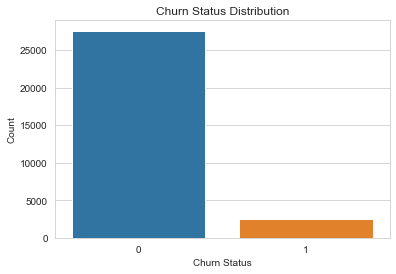

In [325]:
# Taking a look at distribution of Target variable
plt.figure(figsize=(6,4))
sns.countplot(telecom_hv_cust.churn)
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution',fontsize=12)
print(f'Churn percentage: {round(telecom_hv_cust.churn.mean()*100,2)}%')
print(f'Non-Churn percentage: {round((1-telecom_hv_cust.churn.mean())*100,2)}%')

**OBSERVATION:** 
- We have about 8.14% customers churing
- And about 91.86% customers who are not

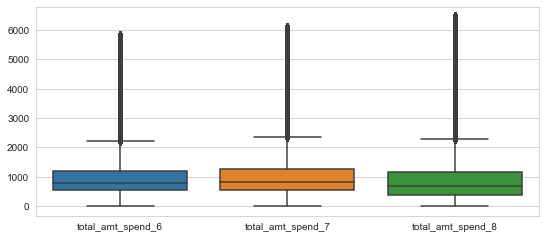

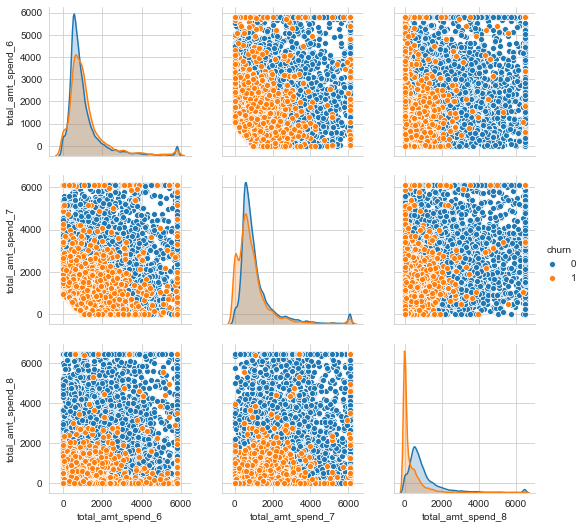

In [327]:
# Looking at outliers for total amount spend in each month
# and the relationship between total monthly expenditure for different months
total_amt_cols = [col for col in telecom_hv_cust.columns if 'total_amt' in col]

plt.figure(figsize=(9, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.subplot(2,1,1)
fig = sns.boxplot(data=telecom_hv_cust[total_amt_cols])
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)

sns.pairplot(data=telecom_hv_cust, vars=total_amt_cols, hue='churn')
plt.show()

In [328]:
telecom_hv_cust[total_amt_cols].describe()

,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8
count,30001.000000,30001.000000,30001.000000
mean,1061.625835,1121.377082,983.665414
std,942.406311,1028.244138,1080.335573
min,0.000000,0.000000,0.000000
25%,546.000000,550.000000,396.000000
50%,788.000000,812.000000,688.000000
75%,1210.000000,1267.000000,1152.000000
max,5814.846382,6085.256469,6461.444930


**OBSERVATION:** 
- We can see very clearly that Majority of the customers are spending about 1200 per month
- But we also have some huge outliers with customers spending 10 times more than that
- We also see a clear trend that customers who consistantly spending less money are more likely to churn

In [ ]:
# Varinace of arpu with respect to user churn
arpu_cols = [col for col in telecom_hv_cust.columns if 'arpu' in col]
sns.pairplot(data=telecom_hv_cust, vars=arpu_cols, hue='churn')

**OBSERVATION:**
- We can make a clear observation that customers with low `arpu` values are more likely to churn

In [ ]:
# Observing trends for categorical variables like fb_users and night pack users
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

# fb_users
plt.subplot(2,3,1)
fig = sns.countplot(telecom_hv_cust.fb_user_6, hue=telecom_hv_cust.churn)
plt.subplot(2,3,2)
fig = sns.countplot(telecom_hv_cust.fb_user_7, hue=telecom_hv_cust.churn)
plt.subplot(2,3,3)
fig = sns.countplot(telecom_hv_cust.fb_user_8, hue=telecom_hv_cust.churn)

# night_pack_users
plt.subplot(2,3,4)
fig = sns.countplot(telecom_hv_cust.night_pck_user_6, hue=telecom_hv_cust.churn)
plt.subplot(2,3,5)
fig = sns.countplot(telecom_hv_cust.night_pck_user_7, hue=telecom_hv_cust.churn)
plt.subplot(2,3,6)
fig = sns.countplot(telecom_hv_cust.night_pck_user_8, hue=telecom_hv_cust.churn)

**OBSERVATION:**
- FB Users
    - Users who dont use fb are least likely to churn
    - As the months increase if a customer is not using fb they are more likely to churn
- Night Pack Users
    - Users who use night packs are least likely to churn

In [ ]:
# Looking at how customers churn based on age on network
plt.figure(figsize=(9, 5))
fig = sns.boxplot(x=telecom_hv_cust.churn, y=telecom_hv_cust.aon)
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)

**OBSERVATION:**
- We can observe that customers who have been using the services longer are less likely to churn

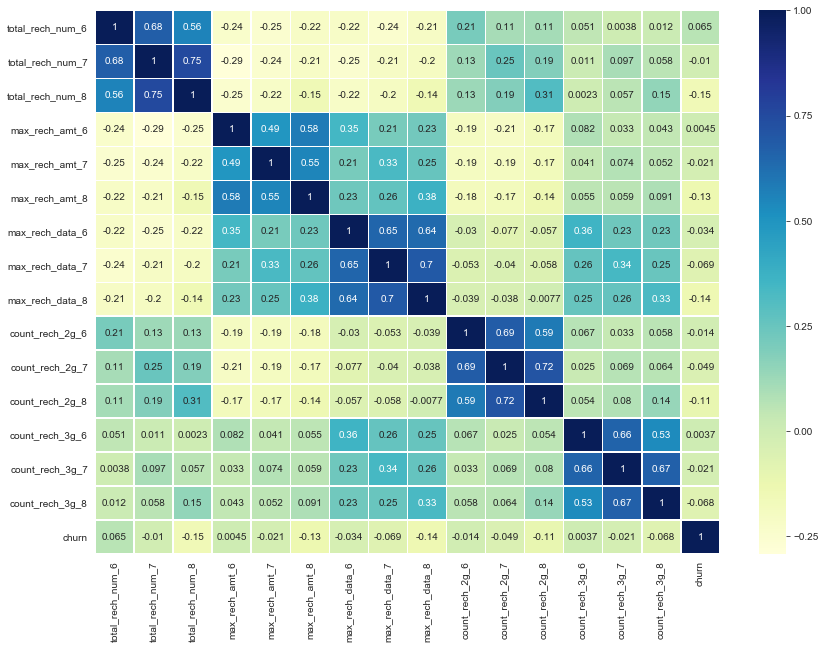

In [54]:
# Correlation matrix for recharge columns
corr_list = [col for col in telecom_hv_cust.columns if 'rech' in col]
corr_list.append('churn')
plt_corr(telecom_hv_cust[corr_list].corr(), size=(14,10))

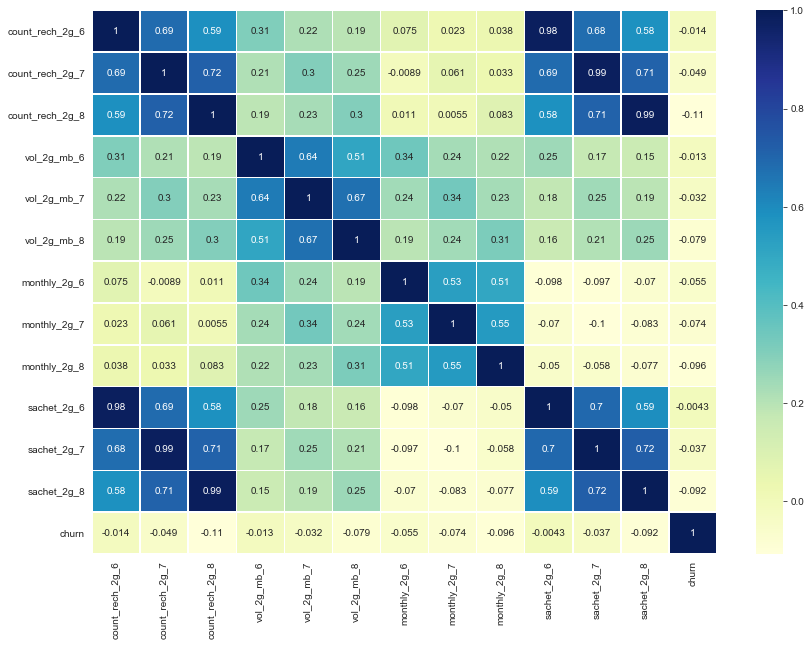

In [55]:
corr_list = [col for col in telecom_hv_cust.columns if '2g' in col]
corr_list.append('churn')
plt_corr(telecom_hv_cust[corr_list].corr(), size=(14,10))

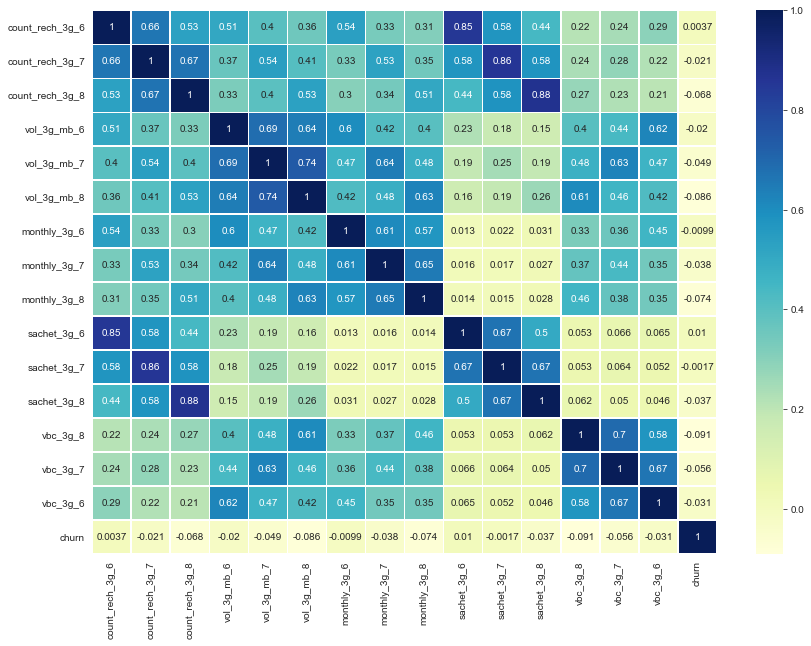

In [56]:
corr_list = [col for col in telecom_hv_cust.columns if '3g' in col]
corr_list.append('churn')
plt_corr(telecom_hv_cust[corr_list].corr(), size=(14,10))

### Outlier Treatment 

In [59]:
# Gaining a general idea of outlier treatment
telecom_hv_cust.describe([0.25,0.50,0.75,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,258.699452,266.560895,229.529099,376.830671,380.777783,340.804418,16.904901,13.109743,14.255862,26.829003,20.149677,20.120558,8

**OBSERVATION:** 
- Most of the data is right skewed
- We observed that less than 1% of high valued customer data lies outside the 3 times std range
- So we can use std deviation method to treat outliers 

In [60]:
# Function to cap outliers to 3 times standard deviation value about mean
def cap_outliers(array, k=3):
    upper_limit = array.mean()+(k*array.std())
    lower_limit = array.mean()-(k*array.std())
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [61]:
# numeric columns
numeric_cols = [col for col in telecom_hv_cust.columns if ('user' not in col) and ('churn' not in col)]

# cap outliers in the numeric columns
telecom_hv_cust[numeric_cols] = telecom_hv_cust[numeric_cols].apply(cap_outliers, axis=0)

In [62]:
# With std deviation outlier treatment we dont lose any rows
print_shape(telecom_hv_cust)

Rows 30001, Columns 140


In [63]:
telecom_hv_cust.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,543.398540,550.814573,498.441171,242.473468,250.009972,212.123255,361.754277,364.699721,325.088602,13.134928,9.650525,10.981303,20.849886,14.989188,15.156859,72

## Step 4: Scaling data, Train-Test Split

### Train-Test Split

In [64]:
# Putting feature variable to X
X = telecom_hv_cust.drop(["churn"], axis=1)

# Putting response variable to y
y = telecom_hv_cust["churn"]

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [66]:
print(f'Train data churn percentage: {round(y_train.mean()*100,2)}%')
print(f'Test data churn percentage: {round(y_test.mean()*100,2)}%')

Train data churn percentage: 8.15%
Test data churn percentage: 8.1%


**OBSERVATION:** 
- Both test and train data sets have equal distribution of churn rate

### Scaling data

In [67]:
# Define standard scaler to scale our data
scaler = StandardScaler()

In [68]:
scaled_X_train_arry = scaler.fit_transform(X_train)
scaled_X_test_arry = scaler.transform(X_test)

In [69]:
# Converting numpy arry to dataframe
scaled_X_train = pd.DataFrame(data=scaled_X_train_arry, columns=X.columns)
scaled_X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8
count,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04
mean,1.448154e-16,1.445035e-16,2.735378e-17,5.302372e-17,-7.755040e-17,1.589152e-16,2.741722e-17,-1.453229e-16,2.659248e-18,-5.691691e-16,-1.245210e-15,-1.018497e-15,3.795271e-16,-9.38

In [70]:
# Converting numpy arry to dataframe
scaled_X_test = pd.DataFrame(data=scaled_X_test_arry, columns=X.columns)
scaled_X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,-0.003113,0.009029,-0.003339,0.007624,0.013672,0.007042,-0.026153,-0.018461,-0.020229,-0.016171,0.008948,0.000275,-0.014613,-0.005138,-0.013873,0.019481,0.020124,0.003668,0.000822,0.000822,0.001653,0.010085,0.003298,0.012504,0.011439,-0.008722,0.000623,0.011240,0.010120,0.004092,-0.002513,0.006738,0.005989,-0.029189,

## Step 5: Model Building
- Model building with PCA
    - PCA
    - Treat class imbalance (SMOTE)
    - Logestic Regression
    - Random Forest
    - Boosting
- Model building without PCA
    - Logistic Regression

### Model building with PCA

#### Building PCA Model

In [71]:
# Getting all the features in PCA which explain 95% variance in our data set
pca = PCA(random_state=1)
pca

PCA(random_state=1)

In [72]:
pca.fit_transform(scaled_X_train)

array([[-4.39957315e+00,  9.44514526e-02, -1.71540747e+00, ...,
        -3.35618933e-02, -8.85520242e-03, -1.74688778e-02],
       [-5.56105478e+00, -9.51279052e-01, -3.16407587e+00, ...,
        -1.44648104e-02, -8.20087406e-03,  4.82097693e-04],
       [-4.96368663e+00, -6.22662939e-01, -3.04033384e+00, ...,
         3.25955782e-02,  2.15601579e-02,  8.47945407e-02],
       ...,
       [ 4.95391299e+00,  3.12167311e+00, -3.34741926e+00, ...,
        -7.87793907e-04, -3.17510364e-03, -1.92307982e-04],
       [ 4.79524639e+00,  5.33457145e+00,  3.06485006e+00, ...,
         4.97470957e-03, -3.45262486e-03,  9.12416251e-02],
       [-2.98352974e+00,  9.25121672e-01, -7.55656401e-01, ...,
        -1.24638425e-02, -2.56435814e-02, -1.36329035e-02]])

In [73]:
pca.components_

array([[ 1.34196939e-01,  1.39319097e-01,  1.29655802e-01, ...,
        -2.67424944e-02, -3.09146188e-02, -1.72117348e-02],
       [ 3.18304475e-02,  3.68435957e-02,  6.07228361e-02, ...,
         6.68639518e-02,  6.99074619e-02,  8.06205333e-02],
       [ 1.18936716e-01,  1.55788829e-01,  1.54677853e-01, ...,
         1.10198725e-01,  1.28129679e-01,  1.33570823e-01],
       ...,
       [-4.57762615e-05,  2.87116422e-03,  4.12411627e-05, ...,
        -3.14234248e-03, -5.83169824e-04, -9.44616530e-03],
       [-2.42912301e-03,  2.24638656e-03,  1.51405710e-03, ...,
        -8.12921322e-03,  2.11998278e-03,  2.93421018e-03],
       [ 9.81956903e-04, -1.11264667e-03,  3.00829341e-03, ...,
         6.29820260e-04, -8.80512093e-03,  2.70243276e-03]])

In [74]:
# Raito of variance explained by every component
pca.explained_variance_ratio_

array([1.24330750e-01, 1.06173399e-01, 6.22242404e-02, 5.45172008e-02,
       4.32486604e-02, 3.23301703e-02, 2.86607483e-02, 2.66492046e-02,
       2.49046763e-02, 2.42912468e-02, 2.17674987e-02, 2.02514807e-02,
       1.93457728e-02, 1.90091693e-02, 1.68404381e-02, 1.54132499e-02,
       1.52248813e-02, 1.35830188e-02, 1.32141328e-02, 1.24080554e-02,
       1.13149519e-02, 1.10252179e-02, 1.05049688e-02, 9.57280953e-03,
       9.33806343e-03, 9.15538552e-03, 8.59257474e-03, 8.28620574e-03,
       7.77175044e-03, 7.74501819e-03, 7.50365456e-03, 7.19284213e-03,
       6.60214653e-03, 6.36885804e-03, 6.10765846e-03, 5.93921348e-03,
       5.85814303e-03, 5.75794350e-03, 5.57333418e-03, 5.49980477e-03,
       5.26032150e-03, 5.04863743e-03, 4.84957253e-03, 4.73951272e-03,
       4.68282920e-03, 4.55791057e-03, 4.43615845e-03, 4.20882412e-03,
       4.01514859e-03, 3.93495923e-03, 3.82954980e-03, 3.77978927e-03,
       3.68427490e-03, 3.63688125e-03, 3.37153306e-03, 3.15919625e-03,
      

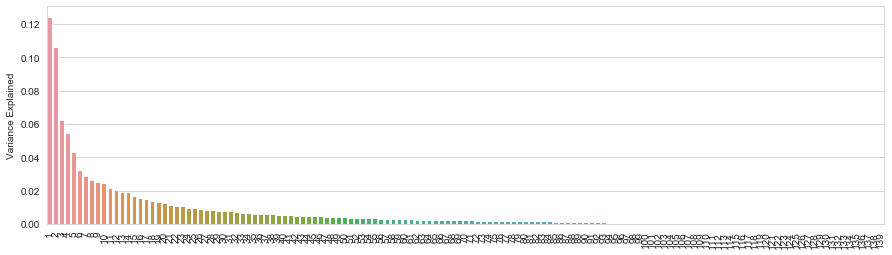

In [75]:
# Plotting Explained variance raito
x_var = np.array(range(1,len(pca.explained_variance_ratio_)+1))
y_var = pca.explained_variance_ratio_
plt_bar(x_var, y_var, ylb='Variance Explained', size=(15,4))

In [76]:
# Calculating cumulative varaince explained after adding another component
var_cumu = np.cumsum(pca.explained_variance_ratio_)

[Text(0, 0.5, 'Percentage Variance Explained'),
 Text(0.5, 0, 'Number of Features'),
 Text(0.5, 1.0, 'Scree Plot')]

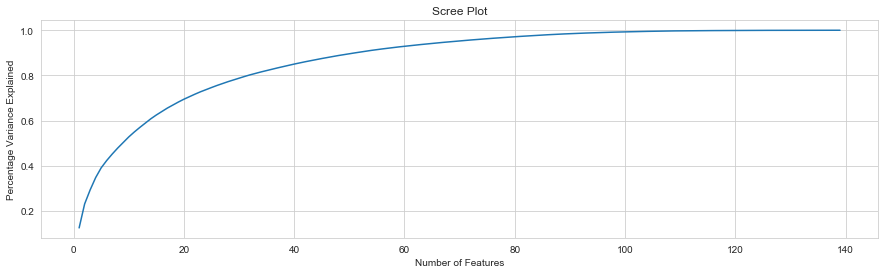

In [77]:
# Scree Plot for cumulative varaince
x_var = np.array(range(1,len(var_cumu)+1))
y_var = var_cumu
fig, ax = plt.subplots(1, 1, figsize=(15,4))
sns.lineplot(x=x_var, y=y_var)
ax.set(xlabel='Number of Features', ylabel='Percentage Variance Explained',title='Scree Plot')

In [78]:
# Look at explainded variance of PCA components
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)

0       12.43
1       23.05
2       29.27
3       34.72
4       39.05
5       42.28
6       45.15
7       47.81
8       50.30
9       52.73
10      54.91
11      56.93
12      58.87
13      60.77
14      62.45
15      64.00
16      65.52
17      66.88
18      68.20
19      69.44
20      70.57
21      71.67
22      72.72
23      73.68
24      74.61
25      75.53
26      76.39
27      77.22
28      77.99
29      78.77
30      79.52
31      80.24
32      80.90
33      81.54
34      82.15
35      82.74
36      83.33
37      83.90
38      84.46
39      85.01
40      85.54
41      86.04
42      86.53
43      87.00
44      87.47
45      87.92
46      88.37
47      88.79
48      89.19
49      89.58
50      89.97
51      90.34
52      90.71
53      91.08
54      91.41
55      91.73
56      92.04
57      92.34
58      92.62
59      92.89
60      93.16
61      93.42
62      93.67
63      93.92
64      94.16
65      94.39
66      94.62
67      94.84
68      95.06
69      95.27
70      95.48
71    

**OBSERVATION:**
- 100% variance is explained by 134 Principal Components
- 95% variance is explained by 69 Principal Components

In [79]:
pca = PCA(.95, random_state=1)
pca

PCA(n_components=0.95, random_state=1)

In [80]:
# We are left with about 139 columns now
df_train_pca = pca.fit_transform(scaled_X_train)
print_shape(df_train_pca)

Rows 21000, Columns 69


In [81]:
# Finding correlation between all Principal componenets
corrmat = np.corrcoef(df_train_pca.transpose())
print_shape(corrmat)

Rows 69, Columns 69


**OBSERVATION:**
- Correlation between all the principal components are close to zero

In [83]:
# Transforming X_test dataset in Principal componenets
df_test_pca = pca.transform(scaled_X_test)
print_shape(df_test_pca)

Rows 9001, Columns 69


#### Treat class imbalance (SMOTE)

In [84]:
# Rectifying class imbalance as churn percentage is < 10%
smote = SMOTE(random_state=1, sampling_strategy=1)
X_train_bal, y_train_bal = smote.fit_resample(df_train_pca, y_train)

In [85]:
print(f'Train data churn percentage: {round(y_train_bal.mean()*100,2)}%')

Train data churn percentage: 50.0%


##### Churn percentage has now increased to 50% of the data available.

In [86]:
print_shape(X_train_bal)

Rows 38576, Columns 69


In [87]:
# Converting numpy arry to dataframe
cols = [f'PCA{i}' for i in range(1, X_train_bal.shape[1]+1)]
X_train_bal = pd.DataFrame(data=X_train_bal, columns=cols)
X_train_bal.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50,PCA51,PCA52,PCA53,PCA54,PCA55,PCA56,PCA57,PCA58,PCA59,PCA60,PCA61,PCA62,PCA63,PCA64,PCA65,PCA66,PCA67,PCA68,PCA69
count,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,-0.373925,-1.245781,-0.186896,-0.791636,-0.019158,-0.402144,0.738219,0.165177,-0.401526,0.117910,0.446393,0.083490,0.102986,-0.049891,0.061092,0.002453,0.011877,0.056904,-0.122878,0.255968,-0.069029,-0.051377,0.003742,-0.042821,0.023187,0.039176,0.318809,0.092292,-0.004979,-0.056865,-0.091213,0.119390,-0.025295,-0.032668,-0.047188,-0.053784,0.054648,-0.112388,-0.048258,-0.018171,0.007739,0.001843,-0.053474,-0.015514,-0.037784,-0.005459,-0.008622,-0.019012,0.004800,0.022302,-0.003085,0.014354,-0.049270,-0.022985,-0.002170,0.016278,-0.024126,0.056325,0.010168,0.003529,0.010375,0.011258,-0.010512,-0.008895,-0.000052,0.039076,0.017320,0.020734,-0.003407
std,3.746620,3.589196,2.623208,2.689270,2.086437,2.222558,2.280924,2.111855,1.984545,1.964944,1.938975,1.460809,1.541067,1.448425,1.315485,1.241132,1.248359,1.155142,1.504551,1.391230,1.064898,1.086999,0.989729,0.985479,0.949488,0.985062,1.518194,1.212765,1.071829,0.922742,1.082471,1.097974,1.036457,0.872242,0.852648,0.879728,0.812729,1.323629,0.840752,0.851779,0.895130,0.845298,0.789051,0.724036,0.743272,0.703512,0.750372,0.699080,0.649785,0.697461,0.733104,0.782336,0.689038,0.623834,0.624004,0.590412,0.614463,0.611217,0.560813,0.556087,0.585722,0.545087,0.534652,0.533194,0.543268,0.560510,0.491629,0.501428,0.541426
min,-11.540114,-9.265816,-8.693476,-9.020532,-8.905146,-7.875911,-9.538671,-6.393895,-9.204442,-8.623433,-9.487386,-7.462868,-9.442324,-5.867840,-8.124659,-8.092993,-7.842554,-6.637007,-6.807609,-7.654339,-7.771422,-8.487614,-4.820119,-8.346099,-12.738351,-7.190793,-7.387442,-6.343706,-6.019203,-7.832948,-4.688347,-5.367487,-4.946745,-5.012189,-4.505465,-4.945792,-3.503996,-10.040870,-5.434907,-4.389037,-5.479116,-6.768435,-4.722091,-3.732384,-4.481642,-8.054507,-4.821023,-8.608205,-18.286586,-4.450354,-3.813491,-4.238783,-6.256640,-8.024255,-7.029328,-3.562631,-4.508587,-3.449250,-4.024013,-3.316534,-3.947080,-4.744841,-4.886905,-3.289716,-4.881880,-3.390023,-3.391245,-4.309289,-4.462872
25%,-3.358013,-3.969150,-1.971240,-2.457064,-1.084383,-1.723421,-0.759686,-0.949515,-1.336275,-1.218980,-0.615701,-0.630596,-0.586511,-0.939301,-0.611090,-0.521439,-0.723863,-0.536141,-1.083723,-0.525142,-0.599387,-0.668685,-0.381562,-0.482532,-0.286533,-0.460534,-0.498686,-0.452216,-0.650933,-0.519184,-0.758500,-0.498594,-0.595045,-0.492585,-0.542556,-0.516569,-0.397218,-0.405713,-0.504456,-0.480718,-0.436226,-0.288955,-0.483058,-0.437028,-0.422834,-0.228170,-0.393503,-0.303640,-0.186585,-0.320154,-0.441623,-0.428410,-0.397582,-0.237738,-0.171857,-0.236800,-0.339428,-0.263908,-0.236447,-0.246270,-0.253575,-0.206040,-0.190189,-0.263423,-0.170484,-0.214570,-0.225923,-0.223726,-0.252494
50%,-0.2946

### Building Logistic Regression Model based on PCA

In [88]:
# Function to draw ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [89]:
# Function to find optimal cutoff point
def find_optimal_cutoff_points(y_test, pred_probs_test):
    cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
    for i in [float(x)/10 for x in range(10)]:
        y_pred_final = np.where(pred_probs_test > i, 1, 0)
        cm1 = metrics.confusion_matrix(y_test, y_pred_final)
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] = [i ,accuracy,sensi,speci]
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

#### Training Phase

In [90]:
# Initialing a model instance
lrm = LogisticRegression()

In [91]:
# Training our model with train data
lrm_pca = lrm.fit(X_train_bal, y_train_bal)

In [92]:
# Output prediction on train dataset
pred_probs_train = lrm_pca.predict_proba(X_train_bal)
pred_probs_train

array([[0.96630021, 0.03369979],
       [0.68512281, 0.31487719],
       [0.80963476, 0.19036524],
       ...,
       [0.47864463, 0.52135537],
       [0.04299854, 0.95700146],
       [0.17642674, 0.82357326]])

In [93]:
'ROC Score on Train data: '+"{:2.2}".format(metrics.roc_auc_score(y_train_bal, pred_probs_train[:,1]))

'ROC Score on Train data: 0.92'

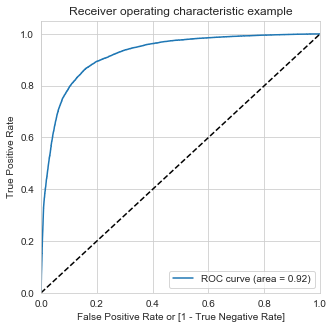

In [94]:
# Drawing ROC curve for train data set
draw_roc(y_train_bal, pred_probs_train[:,1])

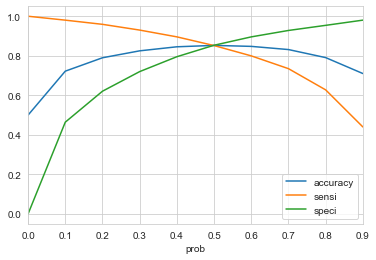

In [95]:
# Trying to estimate the optimal cutoff point for our model
# Which lays emphasis on sensitivity
find_optimal_cutoff_points(y_train_bal, pred_probs_train[:,1])

In [96]:
# Cutoff value of 0.5 seems to give a decent value of accuracy, sensi, and speci
# While laying emphasis on sensitivity
cutoff = 0.5

In [97]:
# Getting final predictions based on cutoff value
y_train_pred_final = np.where(pred_probs_train[:,1] > cutoff, 1, 0)
y_train_pred_final

array([0, 0, 0, ..., 1, 1, 1])

In [98]:
# Let's check the report of our default model on test data
print(metrics.classification_report(y_train_bal, y_train_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     19288
           1       0.85      0.85      0.85     19288

    accuracy                           0.85     38576
   macro avg       0.85      0.85      0.85     38576
weighted avg       0.85      0.85      0.85     38576



**OBSERVATION:** 
- We have got the f-score, recall and precision to be 85% on training data.Let's see how our model responds to test data.

#### Testing Phase

In [99]:
# Output prediction on test dataset
pred_probs_test = lrm_pca.predict_proba(df_test_pca)
pred_probs_test

array([[0.32103277, 0.67896723],
       [0.64054596, 0.35945404],
       [0.99772604, 0.00227396],
       ...,
       [0.88328776, 0.11671224],
       [0.94245175, 0.05754825],
       [0.99579438, 0.00420562]])

In [100]:
'ROC Score: '+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'ROC Score: 0.89'

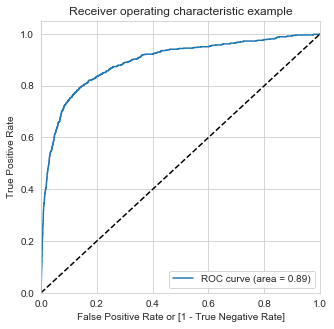

In [101]:
# Drawing ROC curve for train data set
draw_roc(y_test, pred_probs_test[:,1])

In [102]:
# Getting final predictions based on cutoff value
y_pred_final = np.where(pred_probs_test[:,1] > cutoff, 1, 0)
y_pred_final

array([1, 0, 0, ..., 0, 0, 0])

In [103]:
# Let's check the report of our default model on test data
print(metrics.classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8272
           1       0.31      0.80      0.45       729

    accuracy                           0.84      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.93      0.84      0.87      9001



**OBSERVATION:** 
- Thhe f1-score is 91%, the recall for true positives is 80%. It means the model is predicting almost 85% of total data correctly.

#### KFold corss validation for Logistic Regression

In [104]:
lrm = LogisticRegression() 

In [105]:
# Defining folds for kfold corss validation
folds = KFold(n_splits=4, shuffle=True, random_state=1)

In [106]:
scores = cross_val_score(lrm, X_train_bal, y_train_bal, scoring='roc_auc', cv=folds)
'%.2f' % scores.mean()

'0.92'

In [107]:
scores = cross_val_score(lrm, X_train_bal, y_train_bal, scoring='recall', cv=folds)
'%.2f' % scores.mean()

'0.85'

### Building Random Forest Model based on PCA

In [108]:
# Function to print classification report of model on train and test dataset
def get_report(model, X_train, X_test, y_train, y_test):

    train_roc = '%.2f' % metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    test_roc = '%.2f' % metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    line_break()
    print(f'Training Result: ROC Score - {train_roc}')
    line_break()
    # Let's check the report of our default model on training data
    print(metrics.classification_report(y_train, model.predict(X_train)))

    line_break()
    print(f'Testing Result: ROC Score - {test_roc}')
    line_break()
    # Let's check the report of our default model on test data
    print(metrics.classification_report(y_test, model.predict(X_test)))
    line_break()

In [109]:
# Building random forest classifier model without any hyper parameters first
rfc = RandomForestClassifier(random_state=1, n_jobs=-1)

# Fitting random forest classifier model on training data
rfm_pca = rfc.fit(X_train_bal, y_train_bal)

# Get classification report
get_report(rfm_pca, X_train_bal, df_test_pca, y_train_bal, y_test)

***************************************************************************
Training Result: ROC Score - 1.00
***************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19288
           1       1.00      1.00      1.00     19288

    accuracy                           1.00     38576
   macro avg       1.00      1.00      1.00     38576
weighted avg       1.00      1.00      1.00     38576

***************************************************************************
Testing Result: ROC Score - 0.88
***************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8272
           1       0.54      0.51      0.52       729

    accuracy                           0.93      9001
   macro avg       0.75      0.74      0.74      9001
weighted avg       0.92      0

**OBSERVATION:**
- Recall for churning customers is verlow for test data (0.5) compared to training (0.1)
- We can clearly observe that a basic ramdom forest model with default parms it over fitting the train data set
- To overcome the issue of overfitting we will tune the hyperparameters

#### Hyperparam tuning for `max_depth`

In [110]:
# Parameters to build the model on
parameters = {'max_depth': range(2, 20, 4)}

# Fit tree on training data
rfm_max_depth = GridSearchCV(
    rfc,
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
rfm_max_depth.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % rfm_max_depth.best_score_)
print("Best hyperparameters: ", rfm_max_depth.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.9min finished


Best AUC: 0.99
Best hyperparameters:  {'max_depth': 18}


#### Hyperparam tuning for `n_estimators`

In [111]:
# Parameters to build the model on
parameters = {'n_estimators': range(0, 750, 150)}

# Fit tree on training data
rfm_n_estimators = GridSearchCV(
    rfc,
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
rfm_n_estimators.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % rfm_n_estimators.best_score_)
print("Best hyperparameters: ", rfm_n_estimators.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 14.9min finished


Best AUC: 0.99
Best hyperparameters:  {'n_estimators': 600}


#### Hyperparam tuning for `max_features`

In [112]:
# Parameters to build the model on
parameters = {'max_features': range(10, 30, 5)}

# Fit tree on training data
rfm_max_features = GridSearchCV(
    rfc, 
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
rfm_max_features.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % rfm_max_features.best_score_)
print("Best hyperparameters: ", rfm_max_features.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  8.6min finished


Best AUC: 0.99
Best hyperparameters:  {'max_features': 10}


####  Hyperparam tuning for `min_samples_leaf`

In [113]:
# Parameters to build the model on
parameters = {'min_samples_leaf': range(10, 100, 20)}

# Fit tree on training data
rfm_min_samples_leaf = GridSearchCV(
    rfc,
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
rfm_min_samples_leaf.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % rfm_min_samples_leaf.best_score_)
print("Best hyperparameters: ", rfm_min_samples_leaf.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished


Best AUC: 0.98
Best hyperparameters:  {'min_samples_leaf': 10}


####  Hyperparam tuning for `min_samples_split`

In [114]:
# Parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 20)}

# Fit tree on training data
rfm_min_samples_split = GridSearchCV(
    rfc,
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
rfm_min_samples_split.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % rfm_min_samples_split.best_score_)
print("Best hyperparameters: ", rfm_min_samples_split.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished


Best AUC: 0.99
Best hyperparameters:  {'min_samples_split': 10}


**OBSERVATION:** 
- We have got the best values for hyperparameters. Let's use them and build a model.

#### Random Forest Final Model

In [115]:
# Building new model with the parameters found
rfc_final = RandomForestClassifier(
    oob_score=True, 
    random_state=1, 
    n_jobs=-1,
    max_depth=10,
    n_estimators=500,
    max_features=0.3,
    min_samples_leaf=100,
    min_samples_split=400)


# Fitting random forest classifier model on training data
rfm_pca_final = rfc_final.fit(X_train_bal, y_train_bal)

# Get classification report
get_report(rfm_pca_final, X_train_bal, df_test_pca, y_train_bal, y_test)

***************************************************************************
Training Result: ROC Score - 1.00
***************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     19288
           1       0.97      0.98      0.98     19288

    accuracy                           0.98     38576
   macro avg       0.98      0.98      0.98     38576
weighted avg       0.98      0.98      0.98     38576

***************************************************************************
Testing Result: ROC Score - 0.89
***************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8272
           1       0.46      0.62      0.53       729

    accuracy                           0.91      9001
   macro avg       0.71      0.78      0.74      9001
weighted avg       0.92      0

**Observation**
- For Training data we have got good ROC- 94%, with recall for positive values as 84%.
- For Testng data we have got good ROC- 89%, with recall for positive values as 73%.
Seems like the model is not overfitting, but the computational time for hyperparameter tuning is taking nearly 30mins(mailnly on n_estimators)

###### Let's use boosting algorithm and see the report

### Building Boosting based on PCA

###### We will use DecisionTreeClassifier with criterion='entropy' &  max_depth=1 which is a weak learner and hence is used as base estimator for boosting algorithm

In [117]:
# Creating a weak learner
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

# Fitting weak decision tree classifier model on training data
dtc_pca = dtc.fit(X_train_bal, y_train_bal)

# Get classification report
get_report(dtc_pca, X_train_bal, df_test_pca, y_train_bal, y_test)

***************************************************************************
Training Result: ROC Score - 0.70
***************************************************************************
              precision    recall  f1-score   support

           0       0.74      0.60      0.67     19288
           1       0.67      0.79      0.72     19288

    accuracy                           0.70     38576
   macro avg       0.71      0.70      0.69     38576
weighted avg       0.71      0.70      0.69     38576

***************************************************************************
Testing Result: ROC Score - 0.67
***************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      8272
           1       0.14      0.73      0.23       729

    accuracy                           0.61      9001
   macro avg       0.55      0.67      0.49      9001
weighted avg       0.90      0

###### Clearly, the ROC & Recall are very poor.Let's boost this model with general values for hyperparameters.

In [330]:
# Creating a basic boosting model to improve the weak decision tree classifier 
abc = AdaBoostClassifier(base_estimator=dtc, algorithm="SAMME.R", random_state=1,n_estimators=400,learning_rate=1)

# Fitting weak decision tree classifier model on training data
abc_pca = abc.fit(X_train_bal, y_train_bal)

# Get classification report
get_report(abc_pca, X_train_bal, df_test_pca, y_train_bal, y_test)

***************************************************************************
Training Result: ROC Score - 0.95
***************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     19288
           1       0.88      0.88      0.88     19288

    accuracy                           0.88     38576
   macro avg       0.88      0.88      0.88     38576
weighted avg       0.88      0.88      0.88     38576

***************************************************************************
Testing Result: ROC Score - 0.86
***************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8272
           1       0.32      0.72      0.44       729

    accuracy                           0.85      9001
   macro avg       0.64      0.79      0.68      9001
weighted avg       0.92      0

#### Hyperparam tuning for `n_estimators`

In [119]:
# Parameters to build the model on
parameters = {'n_estimators': range(100, 600, 100)}

# Fit tree on training data
abc_n_estimators = GridSearchCV(
    abc,
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
abc_n_estimators.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % abc_n_estimators.best_score_)
print("Best hyperparameters: ", abc_n_estimators.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 31.9min finished


Best AUC: 0.94
Best hyperparameters:  {'n_estimators': 500}


####  Hyperparam tuning for `learning_rate`

In [120]:
# Parameters to build the model on
parameters = {'learning_rate': [0.05,.5, .75, 1]}

# Fit tree on training data
abc_learning_rate = GridSearchCV(
    abc,
    parameters, 
    cv=folds, 
    scoring='roc_auc',
    verbose=1, 
    n_jobs=-1)

# Fitting training data on our model
abc_learning_rate.fit(X_train_bal, y_train_bal)

# Best hyperparameters
print("Best AUC: %.2f" % abc_learning_rate.best_score_)
print("Best hyperparameters: ", abc_learning_rate.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 34.1min finished


Best AUC: 0.94
Best hyperparameters:  {'learning_rate': 0.75}


#### Adaboosting Final model

In [134]:
# Building new model with the parameters found
abc_final = AdaBoostClassifier(
    base_estimator=dtc, 
    algorithm="SAMME.R", 
    random_state=1,
    n_estimators=500,
    learning_rate=0.75)


# Fitting adaboost classifier model on training data
abc_pca_final = abc_final.fit(X_train_bal, y_train_bal)

# Get classification report
get_report(abc_pca_final, X_train_bal, df_test_pca, y_train_bal, y_test)

***************************************************************************
Training Result: ROC Score - 0.95
***************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     19288
           1       0.88      0.88      0.88     19288

    accuracy                           0.88     38576
   macro avg       0.88      0.88      0.88     38576
weighted avg       0.88      0.88      0.88     38576

***************************************************************************
Testing Result: ROC Score - 0.86
***************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8272
           1       0.32      0.72      0.44       729

    accuracy                           0.85      9001
   macro avg       0.64      0.79      0.68      9001
weighted avg       0.92      0

**Observation**
- The ROC for training and test data is very good and also the recall values for true positives(sensitivity) is excellent after adaptiveboosting.


**So, let's consider Adaptiveboosting model with hyperparameters:
n_estimators=500,
learning_rate=0.75
and base_estimator as randomforest classifier(weak learner with max_depth=1)
as a final model which will predit the more number of people who churn than non-churning people(based on high recall for true positives).**

We will use Lasso to understand what could be major predictors so that we dont drop them straight away. We will use a mild regulator 0.1 and get the features through lasso. But first let eliminate non important features and highly correlated features through RPA For optimal parameter lets use RFE to eliminate features to do lasso regression to identify strong predictors

### Without PCA using Logistic Regression

In [233]:
# Putting feature variable to X
X = telecom_hv_cust.drop(["churn"], axis=1)

# Putting response variable to y
y = telecom_hv_cust["churn"]

In [234]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [235]:
scaler=StandardScaler()

In [236]:
scaled_X_train_arry = scaler.fit_transform(X_train)
scaled_X_test_arry = scaler.transform(X_test)

In [237]:
# Converting numpy arry to dataframe
scaled_X_train = pd.DataFrame(data=scaled_X_train_arry, columns=X.columns)
scaled_X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8
count,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04
mean,1.448154e-16,1.445035e-16,2.735378e-17,5.302372e-17,-7.755040e-17,1.589152e-16,2.741722e-17,-1.453229e-16,2.659248e-18,-5.691691e-16,-1.245210e-15,-1.018497e-15,3.795271e-16,-9.38

In [238]:
# Converting numpy arry to dataframe
scaled_X_test = pd.DataFrame(data=scaled_X_test_arry, columns=X.columns)
scaled_X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_spend_6,total_amt_spend_7,total_amt_spend_8
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,-0.003113,0.009029,-0.003339,0.007624,0.013672,0.007042,-0.026153,-0.018461,-0.020229,-0.016171,0.008948,0.000275,-0.014613,-0.005138,-0.013873,0.019481,0.020124,0.003668,0.000822,0.000822,0.001653,0.010085,0.003298,0.012504,0.011439,-0.008722,0.000623,0.011240,0.010120,0.004092,-0.002513,0.006738,0.005989,-0.029189,

In [239]:
# Custom class to build logistic regression model
class LogisticRegressionModel:
    
    def __init__(self, y_train, X_train, y_test, X_test):
        self.y = y_train
        self.X = X_train
        self.y_test = y_test
        self.X_test = X_test
        
    def test_mode(self):
        self.X = self.X_test[self.X.columns]
        self.y = self.y_test
                     
    def get_logit_summary(self):
        self.X_sm = sm.add_constant(self.X)
        logm = sm.GLM(list(self.y), self.X_sm, family=sm.families.Binomial())
        self.res = logm.fit()
        print(self.res.summary())
        
    def get_vif_summary(self):
        vif = pd.DataFrame()
        vif['Features'] = self.X.columns
        vif['VIF'] = [variance_inflation_factor(self.X.values, i) for i in range(self.X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by="VIF", ascending=False)
        print(vif)
        
    def get_model_summary(self):
        self.get_logit_summary()
        self.get_vif_summary()
        
    def drop_feature(self, feature):
        self.X = self.X.drop([feature], 1)
        
    def get_predict_prob_df(self, cutoff):
        self.y_pred = self.res.predict(self.X_sm)
        self.y_pred = self.y_pred.values.reshape(-1)
        self.y_pred_final = pd.DataFrame({'Survived':self.y.values, 'Survived_Prob':self.y_pred})
        self.y_pred_final['predicted'] = self.y_pred_final.Survived_Prob.map(lambda x: 1 if x > cutoff else 0)
        print(self.y_pred_final.head())
        
    def get_confusion_matrix(self):
        confusion = metrics.confusion_matrix(self.y_pred_final.Survived, self.y_pred_final.predicted)
        self.TP = confusion[1,1] # true positive 
        self.TN = confusion[0,0] # true negatives
        self.FP = confusion[0,1] # false positives
        self.FN = confusion[1,0] # false negatives
        print(confusion)
        
    def get_model_accuray(self):
        print('%.2f' % (metrics.accuracy_score(self.y_pred_final.Survived, self.y_pred_final.predicted)*100))
        
    def draw_roc(self):
        actual = self.y_pred_final.Survived
        probs = self.y_pred_final.Survived_Prob
        fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
        auc_score = metrics.roc_auc_score(actual, probs)
        plt.figure(figsize=(5, 5))
        plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        
    def find_optimal_cutoff_points(self):
        cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
        for i in [float(x)/10 for x in range(10)]:
            self.y_pred_final[i]= self.y_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
            cm1 = metrics.confusion_matrix(self.y_pred_final.Survived, self.y_pred_final[i])
            total1=sum(sum(cm1))
            accuracy = (cm1[0,0]+cm1[1,1])/total1
            speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
            sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
            cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
        print(cutoff_df)
        cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
        plt.show()

We will fit an RFE model to get top 20 features.

In [240]:
lm = LogisticRegression(class_weight='balanced')
rfe = RFE(lm, 20)
rfe = rfe.fit(scaled_X_train, y_train)

In [241]:
col = scaled_X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'og_others_8', 'total_og_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8'],
      dtype='object')

#### Model 1

In [242]:
lrmc = LogisticRegressionModel(y_train, scaled_X_train[col], y_test, scaled_X_test[col])

In [243]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3654.3
Date:                Mon, 06 Jul 2020   Deviance:                       7308.7
Time:                        18:40:14   Pearson chi2:                 8.02e+04
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0251      0

Let's drop og_others_8 as it is having high p-value (> 0.05)

In [331]:
lrmc.drop_feature("og_others_8")

KeyError: "['og_others_8'] not found in axis"

#### Model2

In [247]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3658.3
Date:                Mon, 06 Jul 2020   Deviance:                       7316.6
Time:                        18:40:28   Pearson chi2:                 8.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9557      0

In [248]:
lrmc.drop_feature("sachet_2g_8")

In [218]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3659.1
Date:                Mon, 06 Jul 2020   Deviance:                       7318.2
Time:                        18:34:05   Pearson chi2:                 7.97e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9463      0

Dropping std_og_mou_8 as it has high p-value

In [249]:
lrmc.drop_feature("std_og_mou_8")

#### Model3

In [250]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20982
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3660.4
Date:                Mon, 06 Jul 2020   Deviance:                       7320.8
Time:                        18:45:51   Pearson chi2:                 7.76e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9470      0

Let's drop count_rech_2g_6 as it has high p-value

In [251]:
lrmc.drop_feature('count_rech_2g_6')

#### Model4

In [252]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3662.0
Date:                Mon, 06 Jul 2020   Deviance:                       7324.0
Time:                        18:46:21   Pearson chi2:                 7.92e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9435      0

Now, all coluns are having low p-value(< 0.05).We have sachet_2g_7 with very high VIF value, so let's go ahead and drop that variable.

In [253]:
lrmc.drop_feature('sachet_2g_7')

#### Model5

In [254]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3673.5
Date:                Mon, 06 Jul 2020   Deviance:                       7346.9
Time:                        18:46:27   Pearson chi2:                 8.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9285      0

In [255]:
lrmc.drop_feature('count_rech_2g_7')

Let's drop count_rech_2g_7 with next high VIF value.

### Final Logistic Regression model without PCA

In [256]:
lrmc.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3673.9
Date:                Mon, 06 Jul 2020   Deviance:                       7347.9
Time:                        18:46:31   Pearson chi2:                 7.98e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9285      0

We are left with below columns:

In [258]:
final_cols=list(lrmc.X.columns)
final_cols

['arpu_7',
 'onnet_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_8',
 'total_og_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'sachet_2g_6']

In [259]:
scaled_X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7',
       'vbc_3g_6', 'total_amt_spend_6', 'total_amt_spend_7',
       'total_amt_spend_8'],
      dtype='object', length=139)

Let's go ahead and train the model and get the classification report

In [260]:
scaled_X_train=scaled_X_train[final_cols]

In [184]:
scaled_X_train.columns

Index(['arpu_8', 'total_og_mou_7', 'total_rech_num_8', 'loc_ic_t2m_mou_8',
       'arpu_7', 'total_rech_num_7', 'loc_ic_t2m_mou_7', 'offnet_mou_8',
       'count_rech_3g_7', 'count_rech_2g_7', 'sachet_3g_7', 'onnet_mou_8',
       'count_rech_2g_8', 'loc_og_t2m_mou_8', 'sachet_2g_6', 'max_rech_data_8',
       'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_7',
       'spl_ic_mou_8', 'roam_og_mou_8'],
      dtype='object')

In [261]:
scaled_X_test=scaled_X_test[final_cols]

In [262]:
scaled_X_test.columns

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8',
       'sachet_2g_6'],
      dtype='object')

Now that we eliminated all the correlated features lets do lasso to understand the important variables

In [298]:
lr = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',solver='liblinear')
#Fit the model
lrm=lr.fit(scaled_X_train,y_train)

We are using penalty=l1 which implies a lasso classifier. 

In [299]:
# Output prediction on train dataset
pred_probs_train = lrm.predict_proba(scaled_X_train)
pred_probs_train

array([[0.86848068, 0.13151932],
       [0.71046621, 0.28953379],
       [0.53701123, 0.46298877],
       ...,
       [0.96367585, 0.03632415],
       [0.79798082, 0.20201918],
       [0.57758294, 0.42241706]])

In [300]:
'ROC Score on Train data: '+"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'ROC Score on Train data: 0.9'

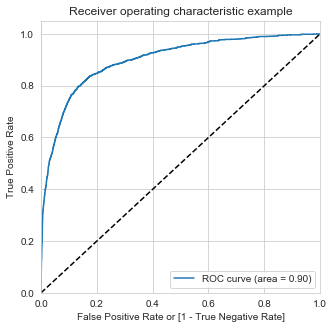

In [301]:
# Drawing ROC curve for train data set
draw_roc(y_train, pred_probs_train[:,1])

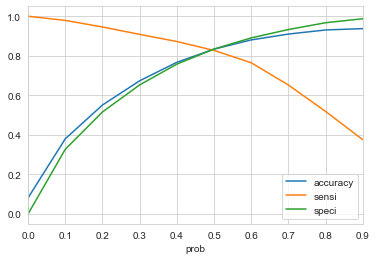

In [302]:
# Trying to estimate the optimal cutoff point for our model
# Which lays emphasis on sensitivity
find_optimal_cutoff_points(y_train, pred_probs_train[:,1])

In [303]:
cutoff=0.5

In [304]:
# Getting final predictions based on cutoff value
y_train_pred_final = np.where(pred_probs_train[:,1] > cutoff, 1, 0)
y_train_pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [305]:
# Model Accuracy
print('Model Accuracy: %.2f' % (metrics.accuracy_score(y_train, y_train_pred_final)*100))

Model Accuracy: 83.36


In [306]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred_final)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[16090  3198]
 [  296  1416]]


In [307]:
# Let's check the report of our default model on test data
print(metrics.classification_report(y_train, y_train_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19288
           1       0.31      0.83      0.45      1712

    accuracy                           0.83     21000
   macro avg       0.64      0.83      0.67     21000
weighted avg       0.93      0.83      0.87     21000



**Observations**
- The ROC for training data is 90% and recall is 83%,f1-score is 0.90

In [311]:
# Output prediction on test dataset
pred_probs_test = lrm.predict_proba(scaled_X_test)
pred_probs_test

array([[0.33874088, 0.66125912],
       [0.61854058, 0.38145942],
       [0.99681595, 0.00318405],
       ...,
       [0.80760451, 0.19239549],
       [0.92867121, 0.07132879],
       [0.94007771, 0.05992229]])

In [312]:
'ROC Score: '+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'ROC Score: 0.89'

In [313]:
# Getting final predictions based on cutoff value
y_pred_final = np.where(pred_probs_test[:,1] > cutoff, 1, 0)
y_pred_final

array([1, 0, 0, ..., 0, 0, 0])

In [314]:
# Model Accuracy
print('Model Accuracy: %.2f' % (metrics.accuracy_score(y_test, y_pred_final)*100))

Model Accuracy: 82.49


In [315]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_final)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[6837 1435]
 [ 141  588]]


In [316]:
# Let's check the report of our default model on test data
print(metrics.classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8272
           1       0.29      0.81      0.43       729

    accuracy                           0.82      9001
   macro avg       0.64      0.82      0.66      9001
weighted avg       0.92      0.82      0.86      9001



**Observations**
- The ROC for training data is 89% and recall is 81%,f1-score is 0.90

In [323]:
#Get the major predictors with weights greater than 0.1
majorpredictors=[]
counter = 0
for col in scaled_X_train.columns.tolist():
    if(abs(lr.coef_[0][counter]) > 0.01):
        print(str(lr.coef_[0][counter]),'-',col)
        majorpredictors.append(col)
    counter+=1

0.584082283364853 - arpu_7
-0.35368526166379016 - onnet_mou_8
-0.7234191964034233 - loc_og_t2m_mou_8
-0.34103016947994097 - std_og_t2m_mou_8
0.2199053968709778 - total_og_mou_7
-0.4798905158727388 - loc_ic_t2t_mou_8
0.40325876592322435 - loc_ic_t2m_mou_7
-1.0409681551603358 - loc_ic_t2m_mou_8
-0.6285549442445757 - spl_ic_mou_8
-0.3379591333297164 - total_rech_num_8
-0.42931190370027156 - last_day_rch_amt_8
-0.6469290342864382 - max_rech_data_8
-0.5118405636335783 - count_rech_2g_8
0.10318436279822278 - sachet_2g_6


#### Let's also build a Adaptive boosting model to see the important features

In [317]:
rfc_base = RandomForestClassifier(bootstrap=True,
                             max_depth=1,
                             class_weight='balanced_subsample')
#Fit the optimal learning parameter on base tree
ABC_Non_PCA = AdaBoostClassifier(
base_estimator=rfc_base,
algorithm="SAMME.R", learning_rate=0.005)

ABC_Non_PCA.fit(scaled_X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                         max_depth=1),
                   learning_rate=0.005)

In [319]:
# Let's check the report of our default model on training data
print(metrics.classification_report(y_train,ABC_Non_PCA.predict(scaled_X_train)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     19288
           1       0.33      0.74      0.45      1712

    accuracy                           0.86     21000
   macro avg       0.65      0.80      0.69     21000
weighted avg       0.92      0.86      0.88     21000



In [320]:
# Let's check the report of our default model on training data
print(metrics.classification_report(y_test,ABC_Non_PCA.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.92      8272
           1       0.32      0.73      0.45       729

    accuracy                           0.85      9001
   macro avg       0.65      0.80      0.68      9001
weighted avg       0.92      0.85      0.88      9001



<Figure size 2160x1440 with 0 Axes>

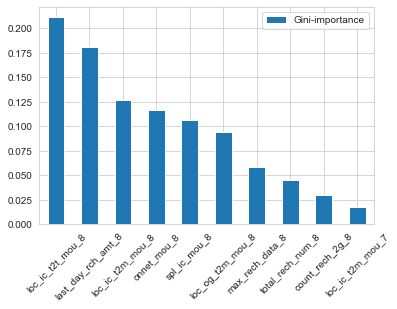

In [321]:
plt.figure(figsize = (30,20))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(scaled_X_test.columns, ABC_Non_PCA.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False).head(10).plot(kind='bar', rot=45)
plt.show()

The Gini-index here, tells us the importance of variables from the adaptiveboosting model.Higher the gini value, more is the importance of the variable.

In [322]:
#Lets print the values
importances.sort_values(by='Gini-importance', ascending=False).head(15)

,Gini-importance
loc_ic_t2t_mou_8,0.2116
last_day_rch_amt_8,0.1808
loc_ic_t2m_mou_8,0.1268
onnet_mou_8,0.1170
spl_ic_mou_8,0.1068
loc_og_t2m_mou_8,0.0940
max_rech_data_8,0.0586
total_rech_num_8,0.0446
count_rech_2g_8,0.0294
loc_ic_t2m_mou_7,0.0178


In [324]:
## Important variables from logistic regression model
majorpredictors

['arpu_7',
 'onnet_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_8',
 'total_og_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'sachet_2g_6']

The important variables are almost same for both Logistic regression model and adaptive boosting with Random Forest Classifier modelling.

**Conclusion**
- In good phase: loc_ic_t2t_mou,loc_ic_t2m_mou,total_og_mou,arpu are most important variables which have to be concentranted.
- In action phase, business has to take care of data in last_day_rch_amt,max_rech_data,loc_og_t2m_mou,loc_ic_t2t_mou.
- Mostly if there is a reduction in incoming and outgoing calls usage from intra network and the pattern of recharges tend to reduce in action phase compared to good are major predictors in identifying a potential churn customer.
